In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [2]:
data = pd.read_csv('final_with_covid_AS.csv')
data.head()

,CountCases,BedDys,BeddystoCC,Severity,DiedCases,DiedBdDys,Hsptlsns,April,August,December,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,CovidPrd
0,17,133,7.823529,75,4,9,13,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,13,372,28.615385,63,4,34,9,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,8,106,13.250000,48,4,13,4,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,45,218,4.844444,153,3,24,42,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,24,238,9.916667,90,3,8,21,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [3]:
data.columns

Index(['CountCases', 'BedDys', 'BeddystoCC', 'Severity', 'DiedCases',
       'DiedBdDys', 'Hsptlsns', 'April', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'MajorCities', 'Regional', 'Female', 'Male', 'Age07',
       'Age816', 'Age1725', 'Age2639', 'Age4064', 'Age6574', 'Age75plus',
       'CarDriver', 'CarPngr', 'Mtrcyclist', 'PdlCyclist', 'Pedestrian',
       'Cntrprt23WldMV', 'CntrprtCrTrkVn', 'CntrprtFxdStnry', 'CntrprtHvyVhcl',
       'CntrprtNClsn', 'CntrprtNA', 'CntrprtOther', 'CntrprtNMV',
       'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn', 'Y2011', 'Y2012',
       'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020',
       'Y2021', 'CovidPrd'],
      dtype='object')

In [4]:
year = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021']
mounth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for user in year:
    for counter_party in mounth:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['Hsptlsns'].sum()
        print(f"Sum of Hsptlsns for {user} and {counter_party}: {result}")

Sum of Hsptlsns for Y2011 and January: 2355
Sum of Hsptlsns for Y2011 and February: 2284
Sum of Hsptlsns for Y2011 and March: 2625
Sum of Hsptlsns for Y2011 and April: 2645
Sum of Hsptlsns for Y2011 and May: 2536
Sum of Hsptlsns for Y2011 and June: 2326
Sum of Hsptlsns for Y2011 and July: 2355
Sum of Hsptlsns for Y2011 and August: 2394
Sum of Hsptlsns for Y2011 and September: 2531
Sum of Hsptlsns for Y2011 and October: 2577
Sum of Hsptlsns for Y2011 and November: 2703
Sum of Hsptlsns for Y2011 and December: 2695
Sum of Hsptlsns for Y2012 and January: 2397
Sum of Hsptlsns for Y2012 and February: 2429
Sum of Hsptlsns for Y2012 and March: 2588
Sum of Hsptlsns for Y2012 and April: 2696
Sum of Hsptlsns for Y2012 and May: 2687
Sum of Hsptlsns for Y2012 and June: 2367
Sum of Hsptlsns for Y2012 and July: 2278
Sum of Hsptlsns for Y2012 and August: 2312
Sum of Hsptlsns for Y2012 and September: 2294
Sum of Hsptlsns for Y2012 and October: 2729
Sum of Hsptlsns for Y2012 and November: 2604
Sum of Hs

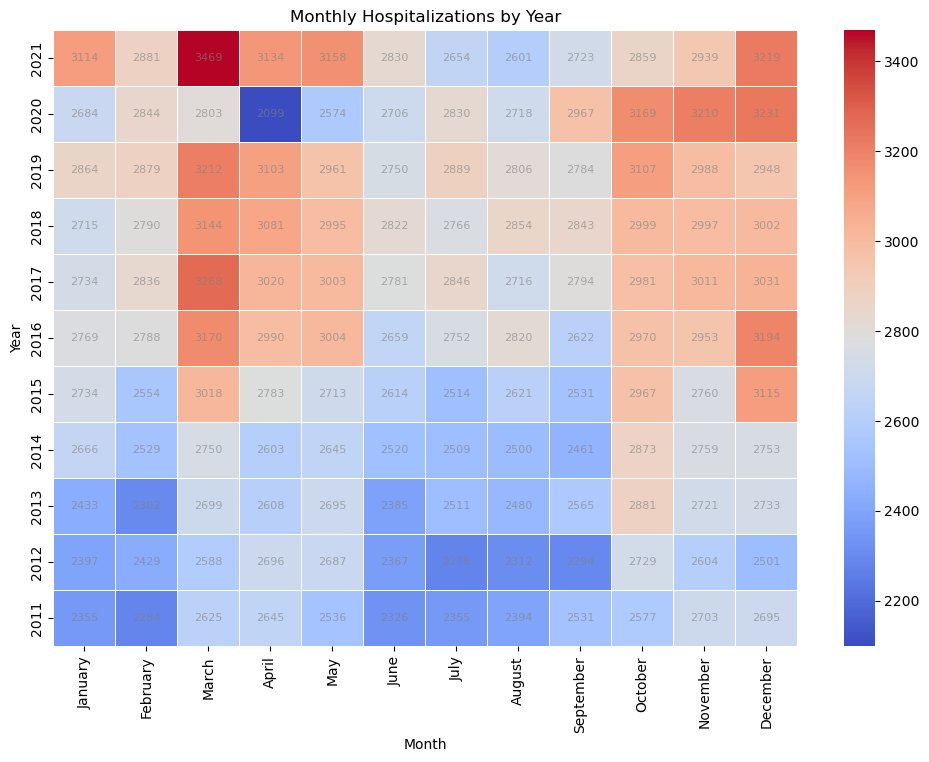

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {
    "January": [2355, 2397, 2433, 2666, 2734, 2769, 2734, 2715, 2864, 2684, 3114],
    "February": [2284, 2429, 2302, 2529, 2554, 2788, 2836, 2790, 2879, 2844, 2881],
    "March": [2625, 2588, 2699, 2750, 3018, 3170, 3268, 3144, 3212, 2803, 3469],
    "April": [2645, 2696, 2608, 2603, 2783, 2990, 3020, 3081, 3103, 2099, 3134],
    "May": [2536, 2687, 2695, 2645, 2713, 3004, 3003, 2995, 2961, 2574, 3158],
    "June": [2326, 2367, 2385, 2520, 2614, 2659, 2781, 2822, 2750, 2706, 2830],
    "July": [2355, 2278, 2511, 2509, 2514, 2752, 2846, 2766, 2889, 2830, 2654],
    "August": [2394, 2312, 2480, 2500, 2621, 2820, 2716, 2854, 2806, 2718, 2601],
    "September": [2531, 2294, 2565, 2461, 2531, 2622, 2794, 2843, 2784, 2967, 2723],
    "October": [2577, 2729, 2881, 2873, 2967, 2970, 2981, 2999, 3107, 3169, 2859],
    "November": [2703, 2604, 2721, 2759, 2760, 2953, 3011, 2997, 2988, 3210, 2939],
    "December": [2695, 2501, 2733, 2753, 3115, 3194, 3031, 3002, 2948, 3231, 3219]
}

df = pd.DataFrame(data, index=[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])
df = df.sort_index()

df = df[::-1]

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt="d", cmap="coolwarm", linewidths=.5,annot_kws={"size": 8, "color": "gray", "alpha": 0.6})
plt.title('Monthly Hospitalizations by Year')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()



In [3]:
year = ['Y2011', 'Y2012', 'Y2013', 'Y2014', 'Y2015', 'Y2016', 'Y2017', 'Y2018', 'Y2019', 'Y2020', 'Y2021']
mounth = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for user in year:
    for counter_party in mounth:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['Severity'].sum()
        print(f"Sum of Severity for {user} and {counter_party}: {result}")

Sum of Severity for Y2011 and January: 7182
Sum of Severity for Y2011 and February: 7014
Sum of Severity for Y2011 and March: 8100
Sum of Severity for Y2011 and April: 8106
Sum of Severity for Y2011 and May: 7806
Sum of Severity for Y2011 and June: 7140
Sum of Severity for Y2011 and July: 7227
Sum of Severity for Y2011 and August: 7398
Sum of Severity for Y2011 and September: 7755
Sum of Severity for Y2011 and October: 7812
Sum of Severity for Y2011 and November: 8271
Sum of Severity for Y2011 and December: 8292
Sum of Severity for Y2012 and January: 7344
Sum of Severity for Y2012 and February: 7503
Sum of Severity for Y2012 and March: 7944
Sum of Severity for Y2012 and April: 8250
Sum of Severity for Y2012 and May: 8286
Sum of Severity for Y2012 and June: 7272
Sum of Severity for Y2012 and July: 6942
Sum of Severity for Y2012 and August: 7098
Sum of Severity for Y2012 and September: 6999
Sum of Severity for Y2012 and October: 8385
Sum of Severity for Y2012 and November: 7965
Sum of Se

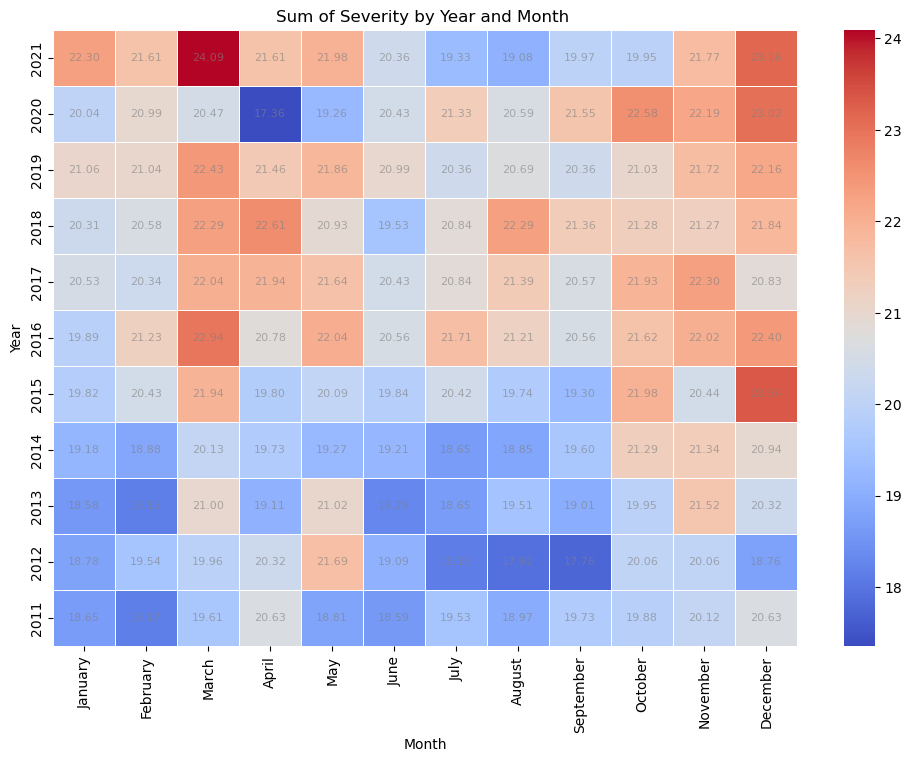

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# داده‌ها
severity_data = {
    "January": [18.654545454545456, 18.782608695652176, 18.582089552238806, 19.178823529411765, 19.823943661971832, 19.889150943396228, 20.53448275862069, 20.31051344743276, 21.057971014492754, 20.03911980440098, 22.295942720763723],
    "February": [18.17098445595855, 19.5390625, 18.146529562982003, 18.880195599022006, 20.43455497382199, 21.227941176470587, 20.33729216152019, 20.583941605839417, 21.035971223021583, 20.98547215496368, 21.6075],
    "March": [19.612590799031477, 19.959798994974875, 21.0, 20.134615384615383, 21.942857142857143, 22.94075829383886, 22.03769401330377, 22.291666666666668, 22.431192660550458, 20.467625899280577, 24.09027777777778],
    "April": [20.625954198473284, 20.320197044334975, 19.113253012048194, 19.730198019801982, 19.80140186915888, 20.78132118451025, 21.942446043165468, 22.608695652173914, 21.45578231292517, 17.355978260869566, 21.613793103448277],
    "May": [18.809638554216868, 21.691099476439792, 21.01530612244898, 19.26618705035971, 20.094202898550726, 22.040963855421687, 21.64235294117647, 20.930875576036865, 21.86024096385542, 19.263546798029555, 21.981438515081205],
    "June": [18.59375, 19.086614173228348, 18.2925, 19.208955223880597, 19.838709677419356, 20.55639097744361, 20.434782608695652, 19.530751708428244, 20.992481203007518, 20.43424317617866, 20.359712230215827],
    "July": [19.532432432432433, 18.12532637075718, 18.653753026634384, 18.64547677261614, 20.424, 21.705426356589147, 20.840579710144926, 20.844444444444445, 20.359628770301626, 21.331658291457288, 19.325242718446603],
    "August": [18.96923076923077, 17.924242424242426, 19.507772020725387, 18.847665847665848, 19.74384236453202, 21.21271393643032, 21.394329896907216, 22.28900255754476, 20.687651331719128, 20.59090909090909, 19.078239608801955],
    "September": [19.732824427480917, 17.763959390862944, 19.00729927007299, 19.6015625, 19.2975, 20.56153846153846, 20.57246376811594, 21.356435643564357, 20.363855421686747, 21.552058111380145, 19.973105134474327],
    "October": [19.87786259541985, 20.059808612440193, 19.95, 21.289156626506024, 21.975728155339805, 21.617224880382775, 21.92753623188406, 21.28103044496487, 21.026785714285715, 22.581947743467932, 19.946511627906975],
    "November": [20.124087591240876, 20.062972292191436, 21.520725388601036, 21.341772151898734, 20.440677966101696, 22.024390243902438, 22.296116504854368, 21.26511627906977, 21.72488038277512, 22.1889400921659, 21.77037037037037],
    "December": [20.62686567164179, 18.764705882352942, 20.315533980582526, 20.94, 23.336609336609335, 22.4, 20.830699774266364, 21.837708830548927, 22.160098522167488, 23.02375296912114, 23.158273381294965]
}

severity_df = pd.DataFrame(severity_data, index=[2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

severity_df = severity_df.iloc[::-1]

plt.figure(figsize=(12, 8))
sns.heatmap(severity_df, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5,annot_kws={"size": 8, "color": "gray", "alpha": 0.6})
plt.title('Sum of Severity by Year and Month ')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

In [18]:
import pandas as pd

# داده‌های شدت (severity) برای هر ماه و هر سال
severity_data = {
    "January": [9342, 8196, 8718, 8307, 8337, 8433, 8445, 8151, 7470, 7344, 7182],
    "February": [8643, 8667, 8772, 8460, 8562, 8661, 7806, 7722, 7059, 7503, 7014],
    "March": [10407, 8535, 9780, 9630, 9939, 9681, 9216, 8376, 8232, 7944, 8100],
    "April": [9402, 6387, 9462, 9360, 9150, 9123, 8475, 7971, 7932, 8250, 8106],
    "May": [9474, 7821, 9072, 9084, 9198, 9147, 8319, 8034, 8238, 8286, 7806],
    "June": [8490, 8235, 8376, 8574, 8460, 8202, 7995, 7722, 7317, 7272, 7140],
    "July": [7962, 8490, 8775, 8442, 8628, 8400, 7659, 7626, 7704, 6942, 7227],
    "August": [7803, 8154, 8544, 8715, 8301, 8676, 8016, 7671, 7530, 7098, 7398],
    "September": [8169, 8901, 8451, 8628, 8517, 8019, 7719, 7527, 7812, 6999, 7755],
    "October": [8577, 9507, 9420, 9087, 9078, 9036, 9054, 8835, 8778, 8385, 7812],
    "November": [8817, 9630, 9081, 9144, 9186, 9030, 8442, 8430, 8307, 7965, 8271],
    "December": [9657, 9693, 8997, 9150, 9228, 9744, 9498, 8376, 8370, 7656, 8292]
}

# تبدیل داده‌ها به DataFrame
severity_df = pd.DataFrame(severity_data, index=[2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011])

# معکوس کردن داده‌ها
severity_df = severity_df.iloc[::-1]

# نمایش متن بر اساس داده‌های جدید
for year in severity_df.index:
    for month in severity_df.columns:
        print(f"Sum of Severity for Y{year} and {month}: {severity_df.at[year, month]}")

Sum of Severity for Y2011 and January: 7182
Sum of Severity for Y2011 and February: 7014
Sum of Severity for Y2011 and March: 8100
Sum of Severity for Y2011 and April: 8106
Sum of Severity for Y2011 and May: 7806
Sum of Severity for Y2011 and June: 7140
Sum of Severity for Y2011 and July: 7227
Sum of Severity for Y2011 and August: 7398
Sum of Severity for Y2011 and September: 7755
Sum of Severity for Y2011 and October: 7812
Sum of Severity for Y2011 and November: 8271
Sum of Severity for Y2011 and December: 8292
Sum of Severity for Y2012 and January: 7344
Sum of Severity for Y2012 and February: 7503
Sum of Severity for Y2012 and March: 7944
Sum of Severity for Y2012 and April: 8250
Sum of Severity for Y2012 and May: 8286
Sum of Severity for Y2012 and June: 7272
Sum of Severity for Y2012 and July: 6942
Sum of Severity for Y2012 and August: 7098
Sum of Severity for Y2012 and September: 6999
Sum of Severity for Y2012 and October: 8385
Sum of Severity for Y2012 and November: 7965
Sum of Se

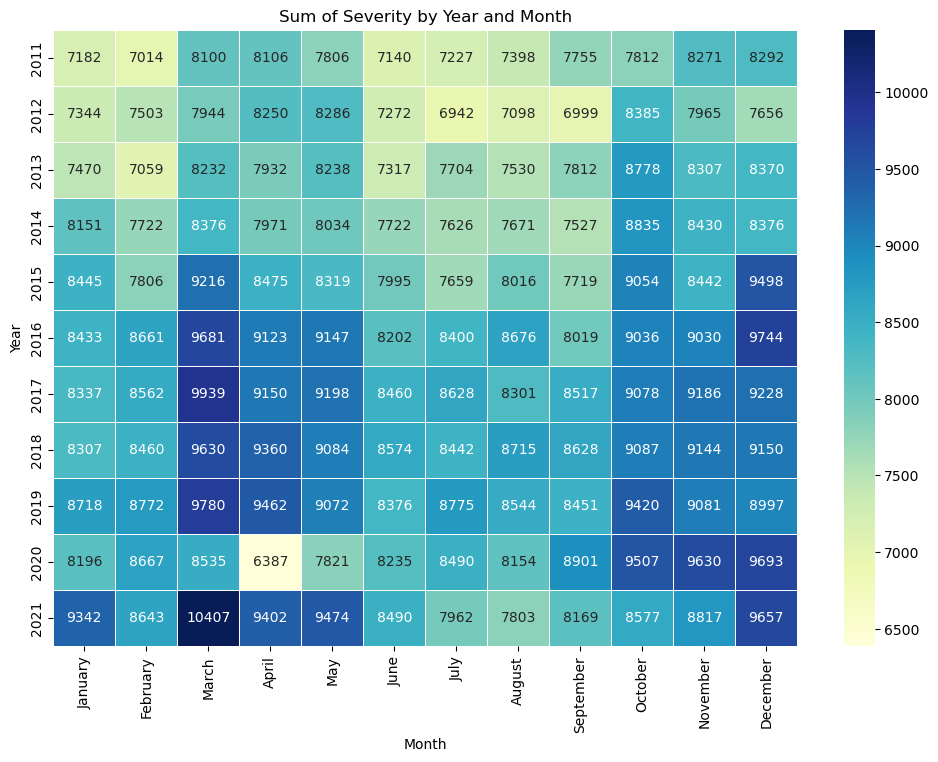

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# داده‌ها
severity_data = {
    "January": [9342, 8196, 8718, 8307, 8337, 8433, 8445, 8151, 7470, 7344, 7182],
    "February": [8643, 8667, 8772, 8460, 8562, 8661, 7806, 7722, 7059, 7503, 7014],
    "March": [10407, 8535, 9780, 9630, 9939, 9681, 9216, 8376, 8232, 7944, 8100],
    "April": [9402, 6387, 9462, 9360, 9150, 9123, 8475, 7971, 7932, 8250, 8106],
    "May": [9474, 7821, 9072, 9084, 9198, 9147, 8319, 8034, 8238, 8286, 7806],
    "June": [8490, 8235, 8376, 8574, 8460, 8202, 7995, 7722, 7317, 7272, 7140],
    "July": [7962, 8490, 8775, 8442, 8628, 8400, 7659, 7626, 7704, 6942, 7227],
    "August": [7803, 8154, 8544, 8715, 8301, 8676, 8016, 7671, 7530, 7098, 7398],
    "September": [8169, 8901, 8451, 8628, 8517, 8019, 7719, 7527, 7812, 6999, 7755],
    "October": [8577, 9507, 9420, 9087, 9078, 9036, 9054, 8835, 8778, 8385, 7812],
    "November": [8817, 9630, 9081, 9144, 9186, 9030, 8442, 8430, 8307, 7965, 8271],
    "December": [9657, 9693, 8997, 9150, 9228, 9744, 9498, 8376, 8370, 7656, 8292]
}

# تبدیل داده‌ها به DataFrame
severity_df = pd.DataFrame(severity_data, index=[2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011])

# مرتب کردن سال‌ها به ترتیب صعودی
severity_df = severity_df.sort_index()

# رسم نمودار هیت مپ
plt.figure(figsize=(12, 8))
sns.heatmap(severity_df, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Sum of Severity by Year and Month')
plt.ylabel('Year')
plt.xlabel('Month')
plt.show()

In [3]:
road_users = ['CarDriver', 'CarPngr', 'Mtrcyclist', 'PdlCyclist', 'Pedestrian']
counter_parties = ['Cntrprt23WldMV', 'CntrprtCrTrkVn', 'CntrprtFxdStnry', 'CntrprtHvyVhcl', 'CntrprtNClsn', 'CntrprtNA', 'CntrprtOther', 'CntrprtNMV', 'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn']

for user in road_users:
    for counter_party in counter_parties:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['Severity'].mean()
        print(f"Sum of Severity for {user} and {counter_party}: {result}")

Mean of Severity for CarDriver and Cntrprt23WldMV: 3.3260869565217392
Mean of Severity for CarDriver and CntrprtCrTrkVn: 77.87281795511223
Mean of Severity for CarDriver and CntrprtFxdStnry: 34.510744985673355
Mean of Severity for CarDriver and CntrprtHvyVhcl: 8.5324298160697
Mean of Severity for CarDriver and CntrprtOther: 4.343692870201097
Mean of Severity for CarDriver and CntrprtNMV: 3.336734693877551
Mean of Severity for CarDriver and CntrprtPdlC: 3.176470588235294
Mean of Severity for CarDriver and CntrprtPdstAnml: 4.1524663677130045
Mean of Severity for CarDriver and CntrprtTrn: 3.2285714285714286
Mean of Severity for CarPngr and Cntrprt23WldMV: 3.264705882352941
Mean of Severity for CarPngr and CntrprtCrTrkVn: 22.79058487874465
Mean of Severity for CarPngr and CntrprtFxdStnry: 10.749149081007488
Mean of Severity for CarPngr and CntrprtHvyVhcl: 4.373466257668712
Mean of Severity for CarPngr and CntrprtOther: 3.5790273556231003
Mean of Severity for CarPngr and CntrprtNMV: 3.08955

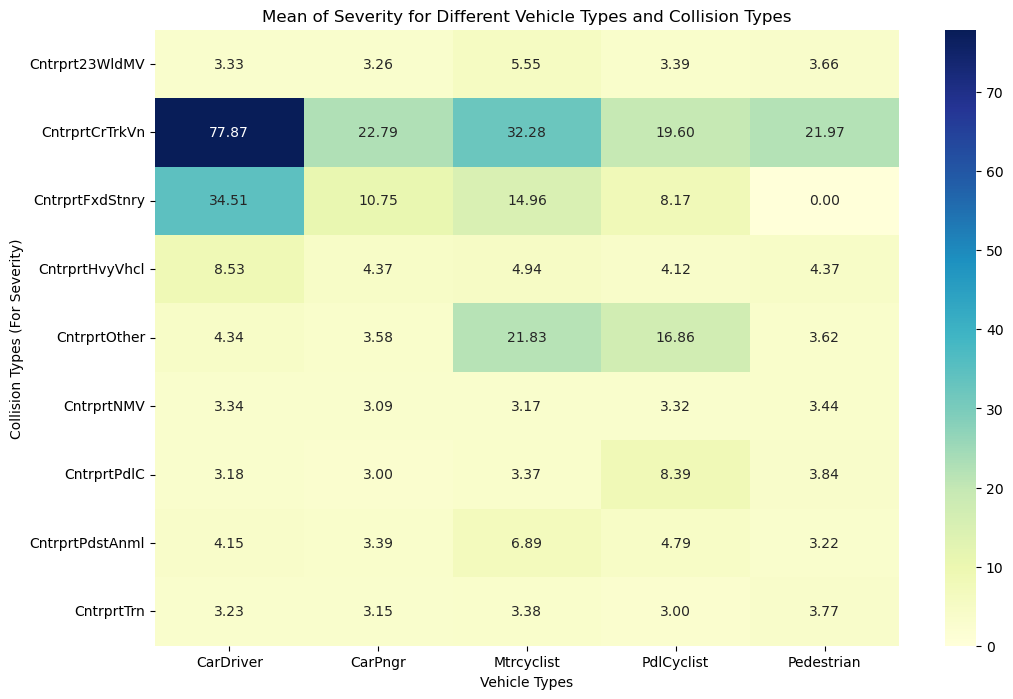

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# داده‌های جدید
mean_beddystocc_data = {
    "CarDriver": [3.3260869565217392, 77.87281795511223, 34.510744985673355, 8.5324298160697, 4.343692870201097, 3.336734693877551, 3.176470588235294, 4.1524663677130045, 3.2285714285714286],
    "CarPngr": [3.264705882352941, 22.79058487874465, 10.749149081007488, 4.373466257668712, 3.5790273556231003, 3.08955223880597, 3.0, 3.3905817174515236, 3.15],
    "Mtrcyclist": [5.546623794212219, 32.28459409594096, 14.962941176470588, 4.942446043165468, 21.827394724664508, 3.174757281553398, 3.3714285714285714, 6.885416666666667, 3.375],
    "PdlCyclist": [3.3857142857142857, 19.596353087443017, 8.171447631754504, 4.125, 16.863911649447807, 3.3176470588235296, 8.392941176470588, 4.790322580645161, 3.0],
    "Pedestrian": [3.659340659340659, 21.97311669128508, 0, 4.3671328671328675, 3.617088607594937, 3.4411764705882355, 3.843520782396088, 3.2205882352941178, 3.770642201834862]
}

# عناوین ستون‌ها
index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl", "CntrprtOther", "CntrprtNMV", "CntrprtPdlC", "CntrprtPdstAnml", "CntrprtTrn"]

# ایجاد DataFrame
mean_beddystocc_df = pd.DataFrame(mean_beddystocc_data, index=index)

# رسم نمودار
plt.figure(figsize=(12, 8))
sns.heatmap(mean_beddystocc_df, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Mean of Severity for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (For Severity)")
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

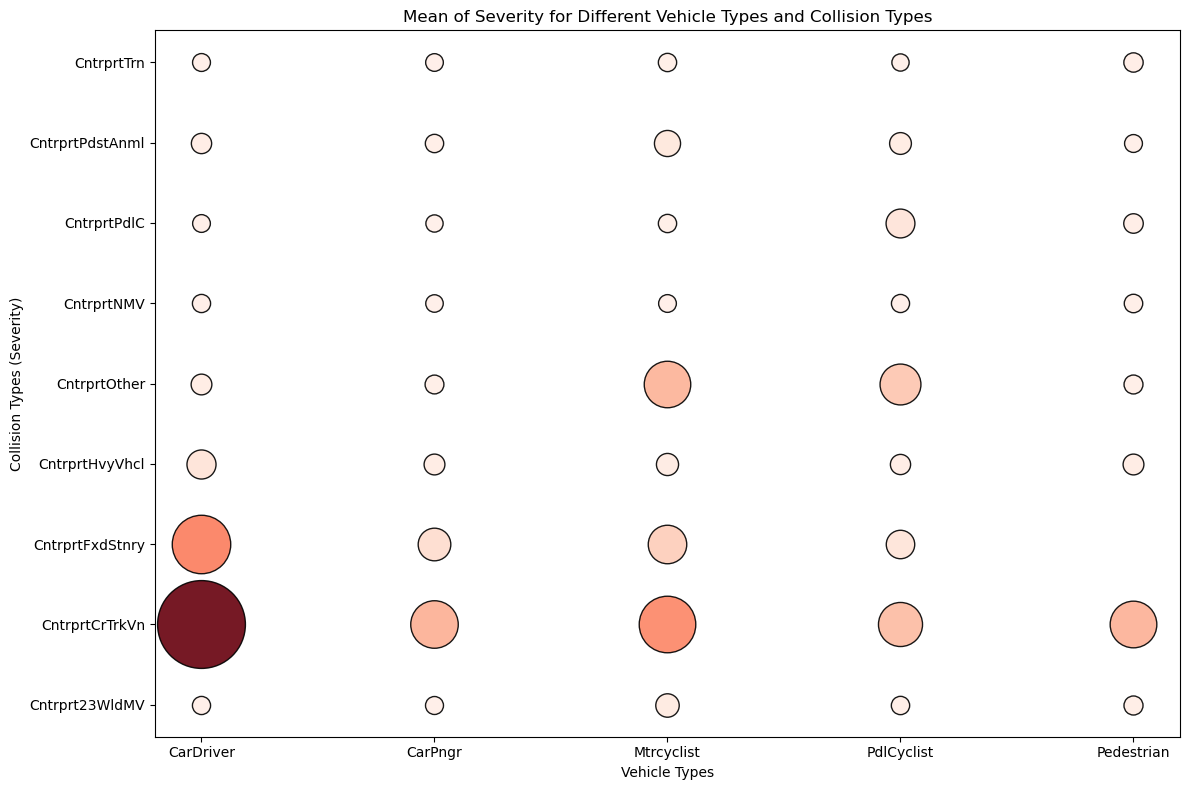

In [9]:
data = {
    "CarDriver": [3.3260869565217392, 77.87281795511223, 34.510744985673355, 8.5324298160697, 4.343692870201097, 3.336734693877551, 3.176470588235294, 4.1524663677130045, 3.2285714285714286],
    "CarPngr": [3.264705882352941, 22.79058487874465, 10.749149081007488, 4.373466257668712, 3.5790273556231003, 3.08955223880597, 3.0, 3.3905817174515236, 3.15],
    "Mtrcyclist": [5.546623794212219, 32.28459409594096, 14.962941176470588, 4.942446043165468, 21.827394724664508, 3.174757281553398, 3.3714285714285714, 6.885416666666667, 3.375],
    "PdlCyclist": [3.3857142857142857, 19.596353087443017, 8.171447631754504, 4.125, 16.863911649447807, 3.3176470588235296, 8.392941176470588, 4.790322580645161, 3.0],
    "Pedestrian": [3.659340659340659, 21.97311669128508,0, 4.3671328671328675, 3.617088607594937, 3.4411764705882355, 3.843520782396088, 3.2205882352941178, 3.770642201834862]
}

# عناوین ستون‌ها
index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl", "CntrprtOther", "CntrprtNMV", "CntrprtPdlC", "CntrprtPdstAnml", "CntrprtTrn"]




df = pd.DataFrame(data, index=index)


plt.figure(figsize=(12, 8))

max_value = df.values.max()
sizes = (df.values / max_value) * 1000

for i in range(len(index)):
    for j in range(len(data.keys())):
        color = plt.cm.Reds(df.iloc[i][j] / max_value)
        plt.scatter(j, i, s=sizes[i][j]*4, alpha=0.9, c=color, edgecolor='Black')

plt.title("Mean of Severity for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (Severity)")
plt.xticks(ticks=range(len(data.keys())), labels=data.keys())  
plt.yticks(ticks=range(len(index)), labels=index) 

plt.tight_layout()  
plt.show()


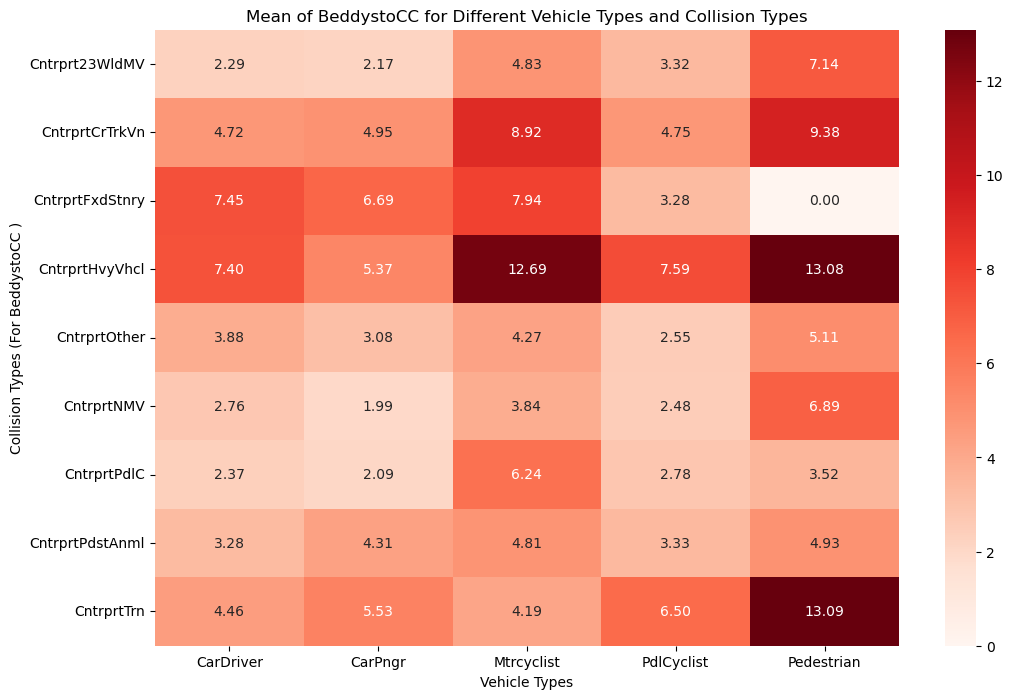

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "CarDriver": [2.2855072463782613, 4.715519605979346, 7.454963727173361, 7.396413710519362, 3.881398537473492, 2.755952380954082, 2.372549019607843, 3.275685102143498, 4.461904761904762],
    "CarPngr": [2.1691176470588234, 4.946846488441651, 6.69083740411062, 5.3688394683052145, 3.078140830799392, 1.992537313432836, 2.090909090909091, 4.305401662049862, 5.525],
    "Mtrcyclist": [4.833244015732047, 8.915389471154059, 7.942463898737645, 12.686810551571941, 4.272191443999536, 3.8446601941747574, 6.241269841266666, 4.811825764245369, 4.1875],
    "PdlCyclist": [3.323809523807143, 4.7528476615225825, 3.27826694998599, 7.5881824713275865, 2.5504120211585333, 2.476470588235294, 2.784559214373333, 3.329281874038306, 6.5],
    "Pedestrian": [7.138644688643956, 9.383837773517874, 0, 13.081643356641026, 5.112737341770569, 6.887254901960785, 3.5207823960977995, 4.9338235294117645, 13.087155963302752]
}
index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl", "CntrprtOther", "CntrprtNMV", "CntrprtPdlC", "CntrprtPdstAnml", "CntrprtTrn"]

df = pd.DataFrame(data, index=index)

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='Reds', fmt='.2f')
plt.title("Mean of BeddystoCC for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (For BeddystoCC )")
plt.show()


In [4]:
road_users = ['CarDriver', 'CarPngr', 'Mtrcyclist', 'PdlCyclist', 'Pedestrian']
counter_parties = ['Cntrprt23WldMV', 'CntrprtCrTrkVn', 'CntrprtFxdStnry', 'CntrprtHvyVhcl', 'CntrprtNClsn', 'CntrprtNA', 'CntrprtOther', 'CntrprtNMV', 'CntrprtPdlC', 'CntrprtPdstAnml', 'CntrprtTrn']

for user in road_users:
    for counter_party in counter_parties:
        filtered_data = data[(data[user] == 1) & (data[counter_party] == 1)]
        result = filtered_data['Hsptlsns'].mean()
        print(f"Sum of Hsptlsns for {user} and {counter_party}: {result}")

Sum of Hsptlsns for CarDriver and Cntrprt23WldMV: 1.108695652173913
Sum of Hsptlsns for CarDriver and CntrprtCrTrkVn: 25.717135732098324
Sum of Hsptlsns for CarDriver and CntrprtFxdStnry: 11.232808022922637
Sum of Hsptlsns for CarDriver and CntrprtHvyVhcl: 2.735237173281704
Sum of Hsptlsns for CarDriver and CntrprtNClsn: 6.595645412130637
Sum of Hsptlsns for CarDriver and CntrprtNA: nan
Sum of Hsptlsns for CarDriver and CntrprtOther: 1.4259597806215722
Sum of Hsptlsns for CarDriver and CntrprtNMV: 1.066326530612245
Sum of Hsptlsns for CarDriver and CntrprtPdlC: 1.0588235294117647
Sum of Hsptlsns for CarDriver and CntrprtPdstAnml: 1.3796711509715993
Sum of Hsptlsns for CarDriver and CntrprtTrn: 0.9904761904761905
Sum of Hsptlsns for CarPngr and Cntrprt23WldMV: 1.0441176470588236
Sum of Hsptlsns for CarPngr and CntrprtCrTrkVn: 7.4873038516405135
Sum of Hsptlsns for CarPngr and CntrprtFxdStnry: 3.500340367597005
Sum of Hsptlsns for CarPngr and CntrprtHvyVhcl: 1.3865030674846626
Sum of Hsp

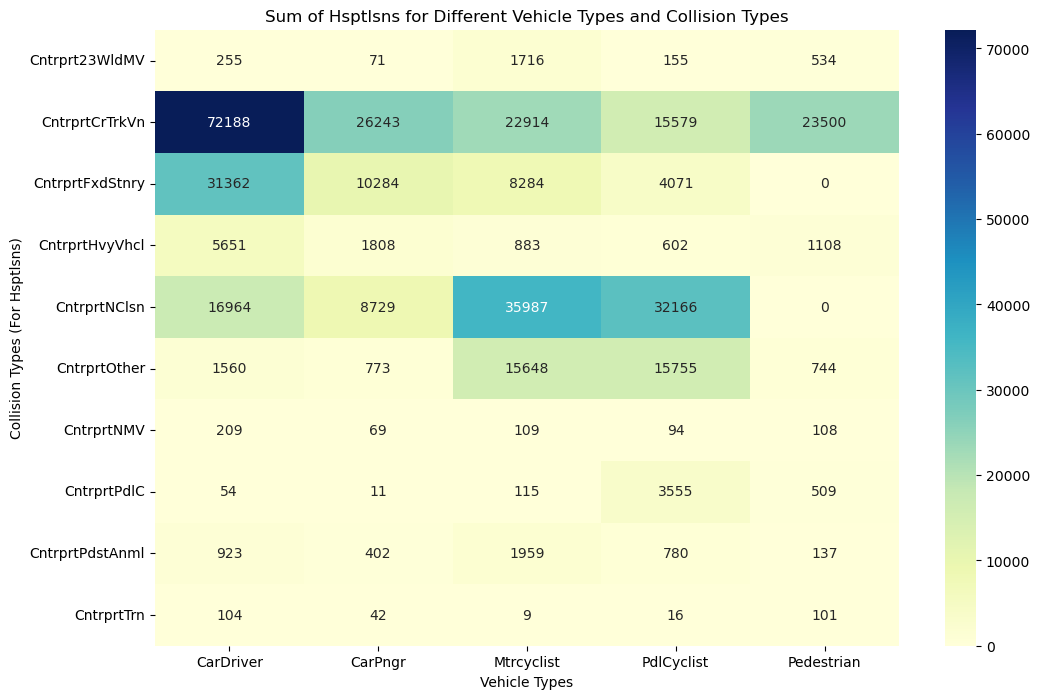

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {
    "CarDriver": [255, 72188, 31362, 5651, 16964, 1560, 209, 54, 923, 104],
    "CarPngr": [71, 26243, 10284, 1808, 8729,  773, 69, 11, 402, 42],
    "Mtrcyclist": [1716, 22914, 8284, 883, 35987, 15648, 109, 115, 1959, 9],
    "PdlCyclist": [155, 15579, 4071, 602, 32166, 15755, 94, 3555, 780, 16],
    "Pedestrian": [534, 23500, 0, 1108, 0,  744, 108, 509, 137, 101]
}
index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl", 
         "CntrprtNClsn", "CntrprtOther", "CntrprtNMV", 
         "CntrprtPdlC", "CntrprtPdstAnml", "CntrprtTrn"]

df = pd.DataFrame(data, index=index)

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Sum of Hsptlsns for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (For Hsptlsns)")
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

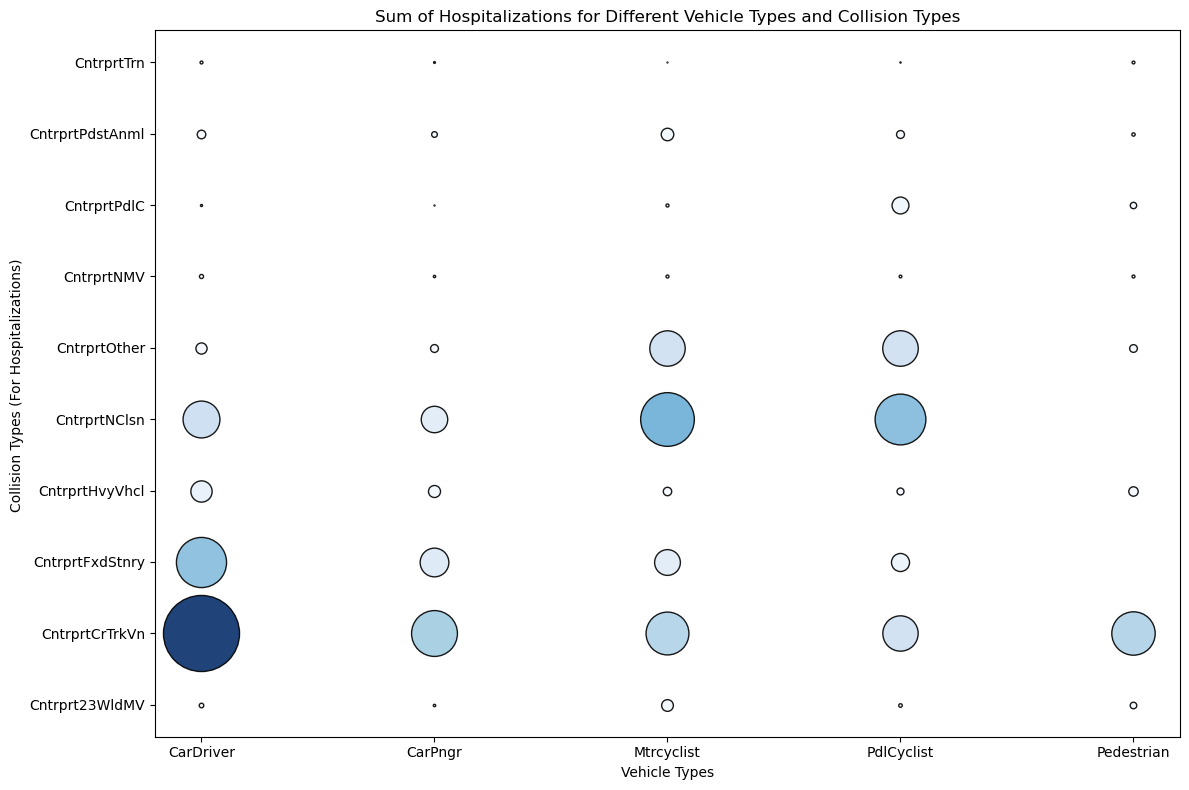

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

data = {
    "CarDriver": [255, 72188, 31362, 5651, 16964, 1560, 209, 54, 923, 104],
    "CarPngr": [71, 26243, 10284, 1808, 8729,  773, 69, 11, 402, 42],
    "Mtrcyclist": [1716, 22914, 8284, 883, 35987,  15648, 109, 115, 1959, 9],
    "PdlCyclist": [155, 15579, 4071, 602, 32166,  15755, 94, 3555, 780, 16],
    "Pedestrian": [534, 23500, 0, 1108, 0,  744, 108, 509, 137, 101]
}
index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl",
         "CntrprtNClsn", "CntrprtOther", "CntrprtNMV",
         "CntrprtPdlC", "CntrprtPdstAnml", "CntrprtTrn"]

df = pd.DataFrame(data, index=index)

plt.figure(figsize=(12, 8))

max_value = df.values.max()
sizes = (df.values / max_value) * 1000

for i in range(len(index)):
    for j in range(len(data.keys())):
        color = plt.cm.Blues(df.iloc[i][j] / max_value) 
        plt.scatter(j, i, s=sizes[i][j]*3, alpha=0.9, c=color, edgecolor='black')

plt.title("Sum of Hospitalizations for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (For Hospitalizations) ")
plt.xticks(ticks=range(len(data.keys())), labels=data.keys()) 
plt.yticks(ticks=range(len(index)), labels=index)  

plt.tight_layout()  
plt.show()


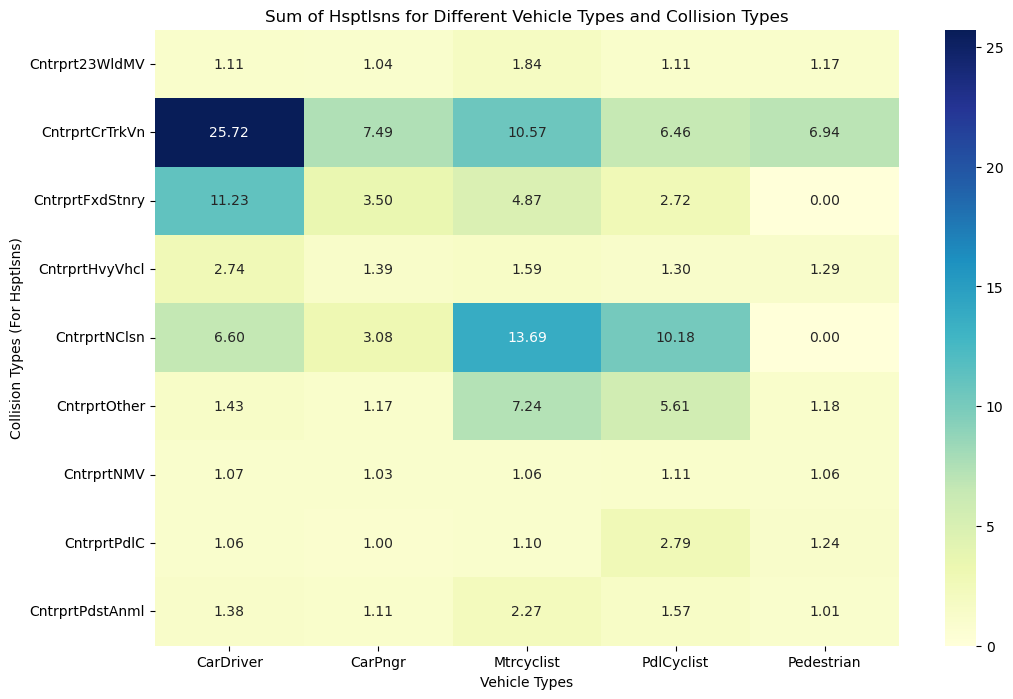

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

new_data = {
    "CarDriver": [1.108695652173913, 25.717135732098324, 11.232808022922637, 2.735237173281704, 6.595645412130637, 1.4259597806215722, 1.066326530612245, 1.0588235294117647, 1.3796711509715993],
    "CarPngr": [1.0441176470588236, 7.4873038516405135, 3.500340367597005, 1.3865030674846626, 3.0768417342262953,  1.174772036474164, 1.0298507462686568, 1.0, 1.113573407202216],
    "Mtrcyclist": [1.8392282958199357, 10.569188191881919, 4.872941176470588, 1.5881294964028776, 13.688474705211107,  7.241092086996761, 1.058252427184466, 1.0952380952380953, 2.267361111111111],
    "PdlCyclist": [1.1071428571428572, 6.456278491504351, 2.71581054036024, 1.2974137931034482, 10.182336182336183,  5.612753829711436, 1.1058823529411765, 2.788235294117647, 1.5725806451612903],
    "Pedestrian": [1.1736263736263737, 6.942392909896602, 0, 1.2913752913752914, 0, 1.1772151898734178, 1.0588235294117647, 1.2444987775061125, 1.0073529411764706]
}

index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl", 
         "CntrprtNClsn",  "CntrprtOther", "CntrprtNMV", 
         "CntrprtPdlC", "CntrprtPdstAnml"]

new_df = pd.DataFrame(new_data, index=index)

plt.figure(figsize=(12, 8))

sns.heatmap(new_df, annot=True, fmt=".2f", cmap="YlGnBu")

plt.title("Sum of Hsptlsns for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (For Hsptlsns)")

plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

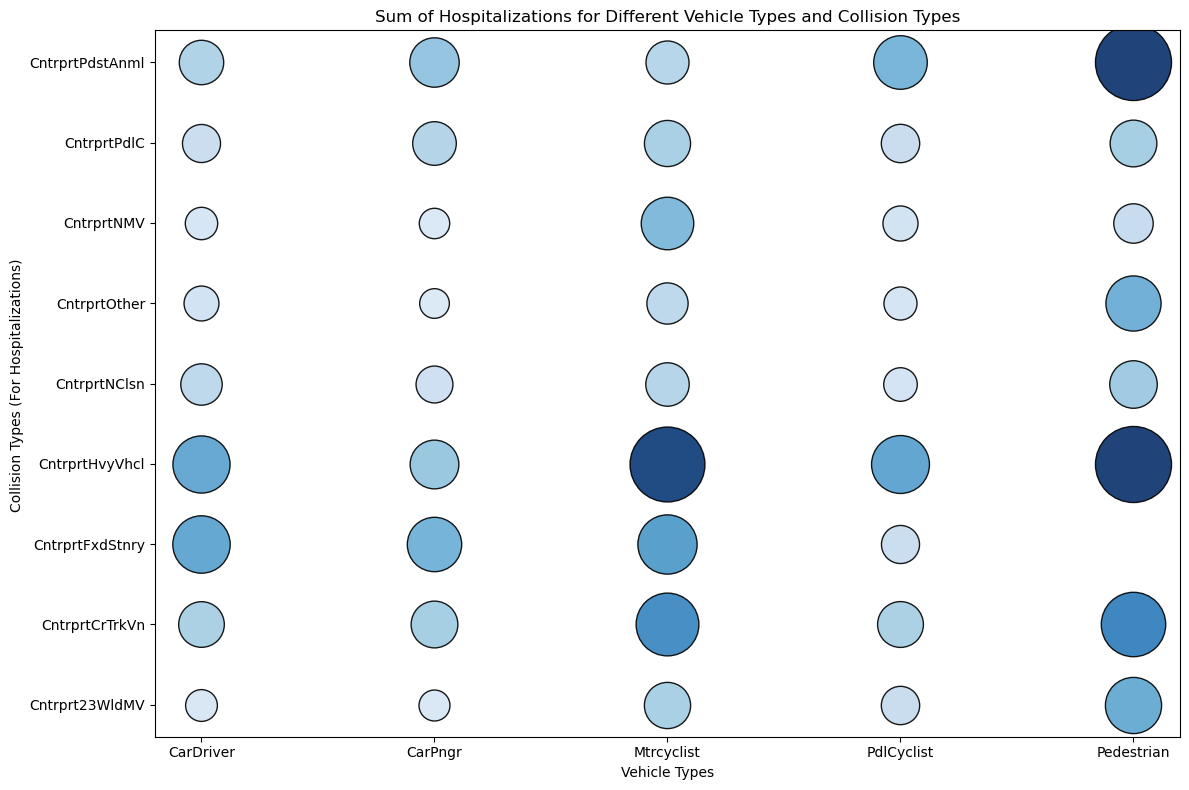

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


new_data = {
    "CarDriver": [1.108695652173913, 25.717135732098324, 11.232808022922637, 2.735237173281704, 6.595645412130637, 1.4259597806215722, 1.066326530612245, 1.0588235294117647, 1.3796711509715993],
    "CarPngr": [1.0441176470588236, 7.4873038516405135, 3.500340367597005, 1.3865030674846626, 3.0768417342262953,  1.174772036474164, 1.0298507462686568, 1.0, 1.113573407202216],
    "Mtrcyclist": [1.8392282958199357, 10.569188191881919, 4.872941176470588, 1.5881294964028776, 13.688474705211107,  7.241092086996761, 1.058252427184466, 1.0952380952380953, 2.267361111111111],
    "PdlCyclist": [1.1071428571428572, 6.456278491504351, 2.71581054036024, 1.2974137931034482, 10.182336182336183,  5.612753829711436, 1.1058823529411765, 2.788235294117647, 1.5725806451612903],
    "Pedestrian": [1.1736263736263737, 6.942392909896602, 0, 1.2913752913752914, 0, 1.1772151898734178, 1.0588235294117647, 1.2444987775061125, 1.0073529411764706]
}

index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl", 
         "CntrprtNClsn",  "CntrprtOther", "CntrprtNMV", 
         "CntrprtPdlC", "CntrprtPdstAnml"]
df = pd.DataFrame(data, index=index)

plt.figure(figsize=(12, 8))

max_value = df.values.max()
sizes = (df.values / max_value) * 1000

for i in range(len(index)):
    for j in range(len(data.keys())):
        color = plt.cm.Blues(df.iloc[i][j] / max_value) 
        plt.scatter(j, i, s=sizes[i][j]*3, alpha=0.9, c=color, edgecolor='black')

plt.title("Sum of Hospitalizations for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (For Hospitalizations) ")
plt.xticks(ticks=range(len(data.keys())), labels=data.keys()) 
plt.yticks(ticks=range(len(index)), labels=index)  

plt.tight_layout()  
plt.show()


/Users/amin/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:198: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
/Users/amin/opt/anaconda3/lib/python3.9/site-packages/seaborn/matrix.py:203: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


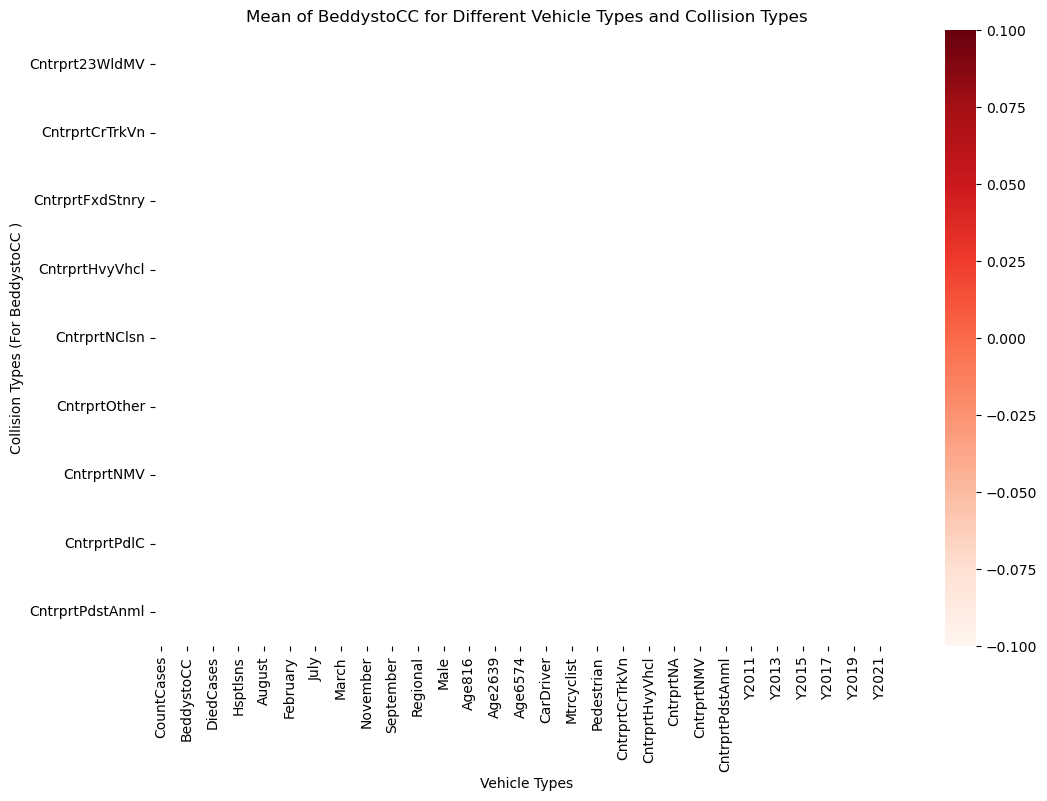

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "CarDriver": [2.2855072463782613, 4.715519605979346, 7.454963727173361, 7.396413710519362, 3.881398537473492, 2.755952380954082, 2.372549019607843, 3.275685102143498, 4.461904761904762],
    "CarPngr": [2.1691176470588234, 4.946846488441651, 6.69083740411062, 5.3688394683052145, 3.078140830799392, 1.992537313432836, 2.090909090909091, 4.305401662049862, 5.525],
    "Mtrcyclist": [4.833244015732047, 8.915389471154059, 7.942463898737645, 12.686810551571941, 4.272191443999536, 3.8446601941747574, 6.241269841266666, 4.811825764245369, 4.1875],
    "PdlCyclist": [3.323809523807143, 4.7528476615225825, 3.27826694998599, 7.5881824713275865, 2.5504120211585333, 2.476470588235294, 2.784559214373333, 3.329281874038306, 6.5],
    "Pedestrian": [7.138644688643956, 9.383837773517874, 0, 13.081643356641026, 5.112737341770569, 6.887254901960785, 3.5207823960977995, 4.9338235294117645, 13.087155963302752]
}
index = ["Cntrprt23WldMV", "CntrprtCrTrkVn", "CntrprtFxdStnry", "CntrprtHvyVhcl", "CntrprtOther", "CntrprtNMV", "CntrprtPdlC", "CntrprtPdstAnml", "CntrprtTrn"]

df = pd.DataFrame(data, index=index)

plt.figure(figsize=(12, 8))
sns.heatmap(df, annot=True, cmap='Reds', fmt='.2f')
plt.title("Mean of BeddystoCC for Different Vehicle Types and Collision Types")
plt.xlabel("Vehicle Types")
plt.ylabel("Collision Types (For BeddystoCC )")
plt.show()
